<a href="https://colab.research.google.com/github/ryan-merser/FAERS/blob/main/Task2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ST 554 Project 1: Task 2

Ryan Mersereau

This colab notebook is for conducting an extensive Exploratory Data Analysis (EDA) to understand the relationships sensor and weather
variables have with the measurement of the air pollutant **Benzene** (C6H6).

## Reading in Data

We'll use the air quality data found at the UCI machine learning repository; let's read it in below!

In [ ]:
# Importing necessary packages
!pip install ucimlrepo
import ucimlrepo as uci
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in data
air_quality = uci.fetch_ucirepo(id=360)
air_quality.data.features.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


This data is time series data collected from March 2004 to February 2005 in Italy, and contains measurements of pollutants and weather associated with the measurements at that time. There are several columns recording different pollutant concentrations.

Specifically, we want to investigate C6H6 as the response, which is the true hourly averaged Benze concentration in micrograms, as stated [here](https://https://archive.ics.uci.edu/dataset/360/air+quality)

Using the `.info()` method, we can get some additional information about the counts and datatypes of each variable.

In [ ]:
air_quality.data.features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


We can also call the `.shape` attribute to see the shape of our dataset

In [ ]:
air_quality.data.features.shape

(9357, 15)

The original dataset has 15 columns and 9,357 rows

## Data Cleaning and Manipulation

We are told to ignore the 'true' variables (besides C6H6), which are  gold standard measurements of pollutants in the air. These are indacted by column names ending with (GT), so let's make a new dataframe excluding these columns by subsetting the dataframe created above.

In [ ]:
air_df = air_quality.data.features.drop(columns = air_quality.data.features.columns[[2, 4, 7, 9]])


We can then call this new dataframe and verify columns are dropped!

In [ ]:
air_df

,Date,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,1360,11.9,1046,1056,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,1292,9.4,955,1174,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,1402,9.0,939,1140,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,1376,9.2,948,1092,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1272,6.5,836,1205,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,1314,13.5,1101,539,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,1163,11.4,1027,604,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,1142,12.4,1063,603,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,1003,9.5,961,702,1041,770,28.3,13.5,0.5139


As stated on the dataset website, missing values are tagged with a -200 value. Therefore, we want to exclude any rows containing -200 options.

First, lets see how many -200 or missing values there are.

In [ ]:
(air_df == -200).sum()

,0
Date,0
Time,0
PT08.S1(CO),366
C6H6(GT),366
PT08.S2(NMHC),366
PT08.S3(NOx),366
PT08.S4(NO2),366
PT08.S5(O3),366
T,366
RH,366


There appear to be 366 rows with missing data. Dropping these shouldn't be an issue since our original data set is over 9,000 observations.

We can do this by converting -200 cells to NaN values with `replace()`, and then using `.dropna()` to drop rows with na values. This will give us data with no missing values that will be more accurate and reliable for generating things like summary statistics.

In [ ]:
air_df.replace(-200, np.nan, inplace = True)
air_df.dropna(inplace = True)
air_df.shape

(8991, 11)

From using the shape method once again, we can see our dataset with no missing values is now 11 columns and 8,991 rows.

Now we can get started with data analysis!

## Numerical Summaries and Variable investigation

Lets begin by finding summary statistics of our numeric variables (date and time excluded) using the `describe()` method

In [ ]:
air_df.loc[:, "PT08.S1(CO)":"AH"].describe()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,1099.833166,10.083105,939.153376,835.493605,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,217.080037,7.449820,266.831429,256.817320,346.206794,398.484288,8.832116,17.316892,0.403813
min,647.000000,0.100000,383.000000,322.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,937.000000,4.400000,734.500000,658.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1063.000000,8.200000,909.000000,806.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,1231.000000,14.000000,1116.000000,969.500000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,2040.000000,63.700000,2214.000000,2683.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


This table gives us the count, mean, standard deviation, minimum, 25th quartile, 50th quartile, 75th quartile, and maximum for each variable.

We are particularly interested in our response variable, C6H6(GT), so lets dive into that deeper!

We can create a histogram to visualize the distribution of this variables observations

Text(0.5, 1.0, 'Distribution of C6H6(Benzene)')

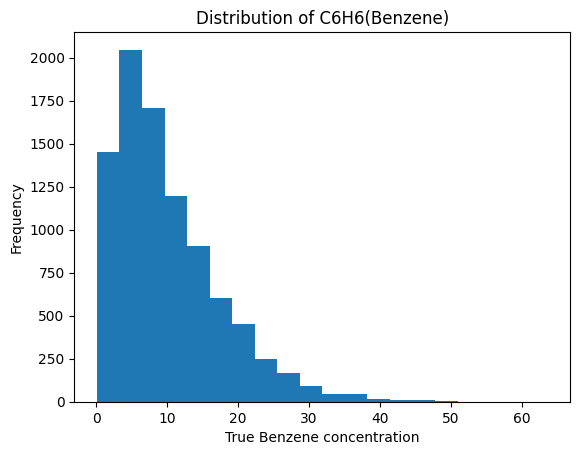

In [ ]:
# Histogram of Benzene
plt.hist(air_df["C6H6(GT)"], bins = 20)
plt.xlabel("True Benzene concentration")
plt.ylabel("Frequency")
plt.title("Distribution of C6H6(Benzene)")

As we can see from the histogram, the distribution is skewed right, and does not appear to be normal (bell-shaped). This means most of the observations are concentrated around 10(micrograms), but some rare observations can be seen around 30 or 40 micrograms.

We can also illustrate this with a density plot, where y is now the proportion of total observations instead of counts (frequency)

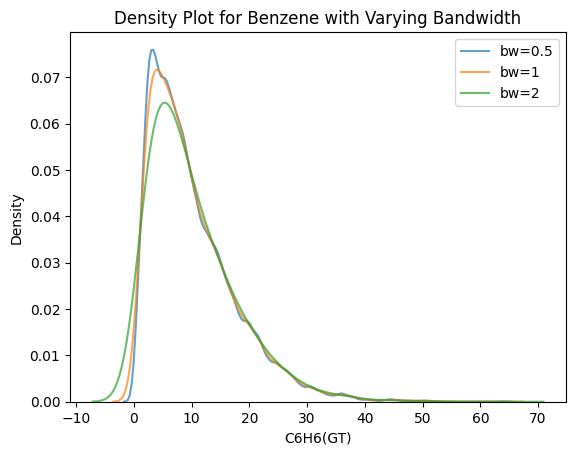

In [ ]:
# Density plot for Benzene
sns.kdeplot(air_df['C6H6(GT)'], bw_adjust=0.5,alpha=0.7, label='bw=0.5')
sns.kdeplot(air_df['C6H6(GT)'], bw_adjust=1, alpha=0.7, label='bw=1')
sns.kdeplot(air_df['C6H6(GT)'], bw_adjust=2, alpha=0.7, label='bw=2')

plt.xlabel('C6H6(GT)')
plt.ylabel('Density')
plt.title('Density Plot for Benzene with Varying Bandwidth')
plt.legend()
plt.show()

Here we see a similar shape as produced by the histogram, with 3 overlayed curves representing different 'smoothness' levels of the curve.

Now, lets investigate numeric summaries of our response variable C6H6(GT) at different levels/combinations of other variables

Lets start by looking at the temperature variable (T). We can group the temperature variable into different ranges, and see if there is a difference in mean Benzene observations at different temperatures.

In [ ]:
pd.cut(air_df["T"], bins = [-5, 5, 15, 25, 35, 45]).head()

,T
0,"(5, 15]"
1,"(5, 15]"
2,"(5, 15]"
3,"(5, 15]"
4,"(5, 15]"


Now, we can specify a label for each bin! Something like:

  - -5 to 5 = Very cold
  - 5 to 15 = Chilly
  - 15 to 25 = Nice
  - 25 to 35 = Hot
  - 35 to 45 = Very Hot

  These are in celsius!

In [ ]:
# Saving new object temp_bin
air_df["Temp_bin"] = pd.cut(air_df["T"], bins = [-5, 5, 15, 25, 35, 45], labels = ["Very Cold", "Chilly", "Nice", "Hot", "Very Hot"])
air_df["Temp_bin"].value_counts()

,count
Temp_bin,
Nice,3397
Chilly,2996
Hot,1653
Very Cold,539
Very Hot,406


Here are the displayed counts of each temperature bin we created! For example, there are 3397 observations with 'nice' temperature, and 406 observations with 'very hot' temperature.

 Now, we can generate the mean benzene observation for each temperature range!

In [ ]:
air_df.groupby("Temp_bin", observed = True)["C6H6(GT)"].mean()

,C6H6(GT)
Temp_bin,
Very Cold,5.170872
Chilly,8.834379
Nice,11.010804
Hot,11.885118
Very Hot,10.720443


Interestingly, we see the mean observed benzene is significantly lower in cold weather! Going from an average of 11 micrograms for Nice weather, to 8.8 in Chilly weather, and 5.17 in Very Cold weather.

We can also represent these differences with several box plots!

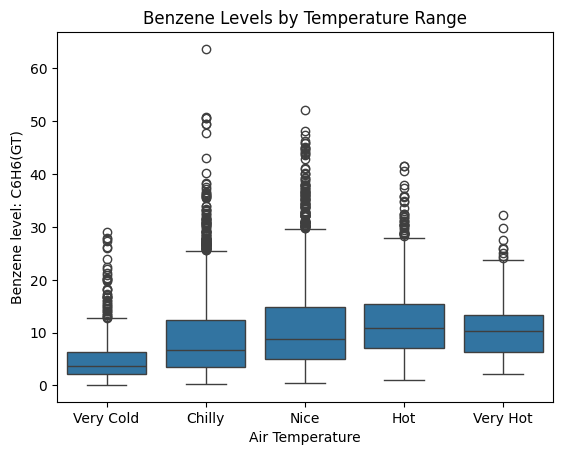

In [ ]:
# Side-by-side boxplots
sns.boxplot(data=air_df, x='Temp_bin', y='C6H6(GT)', order=["Very Cold", "Chilly", "Nice", "Hot", "Very Hot"])
plt.xlabel('Air Temperature')
plt.ylabel('Benzene level: C6H6(GT)')
plt.title('Benzene Levels by Temperature Range')
plt.show()


These boxplots illustrate some significant differences in benzene levels across temperatures. The blue boxes represents the middle 50% of data, and the horizontal line inside each blue box are the median value for each temperature range. The circles above each box plot represent several outliers.

From this, we can confirm that the median benzene levels during very cold temperatures appear to be lower than other temperature ranges. Additionally, the minimum, Inter-quartile range, and maximum are also lower in the 'Very cold' group.

Lets do something similar one more time by looking at levels of sensor readings compared to the actual observed benzene level. For example, lets look at the first sensor "PT08.S1", which senses for atmosphering CO (Carbon monoxide) levels.

First we'll look at a histogram of the sensor data:




Text(0.5, 1.0, 'Distribution of observed atmospheric Carbon monoxide')

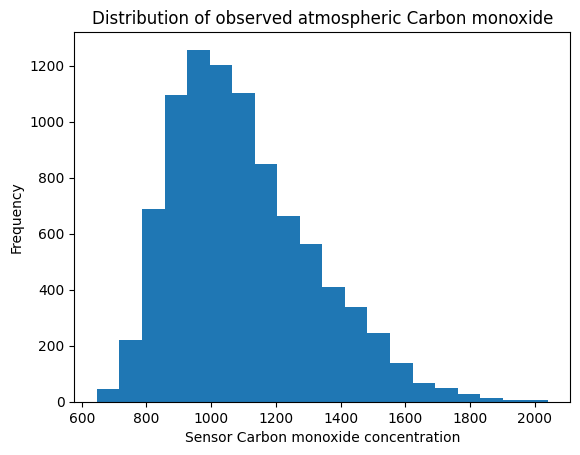

In [ ]:
# Histogram of Carbon monoxide sensor data
plt.hist(air_df["PT08.S1(CO)"], bins = 20) # Arbitrary bin value, just wanted to demonstrate shape of distribution
plt.xlabel("Sensor Carbon monoxide concentration")
plt.ylabel("Frequency")
plt.title("Distribution of observed atmospheric Carbon monoxide")

We can see from this histogram that the cobat concentrations are also slightly right skewed, and range from around 600 to 2000

Based on this, lets create some ranges for Carbon monoxide concentration and save them to a new variable:

In [ ]:
air_df["CO_bin"] = pd.cut(air_df["PT08.S1(CO)"], bins = [600, 900, 1200, 1500, 2100], labels = ["Low", "Moderate", "High", "Very High"])
air_df["CO_bin"].value_counts()

,count
CO_bin,
Moderate,4773
High,2095
Low,1647
Very High,476


Now, we can create more boxplots in a similar manner to investigate the relationship between sensor readings for Carbon monoxide and true atmospheric benzene levels!

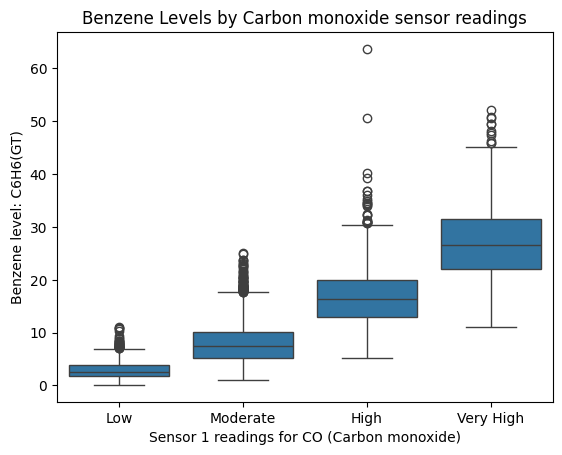

In [ ]:
# Side-by-side boxplots
sns.boxplot(data=air_df, x='CO_bin', y='C6H6(GT)', order=["Low", "Moderate", "High", "Very High"])
plt.xlabel('Sensor 1 readings for CO (Carbon monoxide)')
plt.ylabel('Benzene level: C6H6(GT)')
plt.title('Benzene Levels by Carbon monoxide sensor readings')
plt.show()

Here we have some clear evidence of differences in benzene measurements based on the first sensor reading for Carbon monoxide. If the sensor reading is 'low", benzene levels average less than 5 micrograms. However, if the sensor reading is "very high", benzene levels average around 25 micrograms! There are several outliers, but this first sensor appears to be a good indication of true atmospheric benzene levels.

## Correlation Investigation

Now, lets look at correlations between variables. That is, a quantitative measure of the linear relationship between two variables.

This correlation matrix below shows the linear relationship for all combinations of variables! Correlation, also known as r, is measured on a scale from -1 to 1. For example, a value near 1 (color coded blue) represents a strong, positive linear association between the two variables. A value near -1 represents a strong, negative linear association (color coded red). A value near 0 (white color) represents little to no association.

It's worth noting that the diagonal elements have a perfect positive correlation (1) because this is the correlation of a variable with itself!

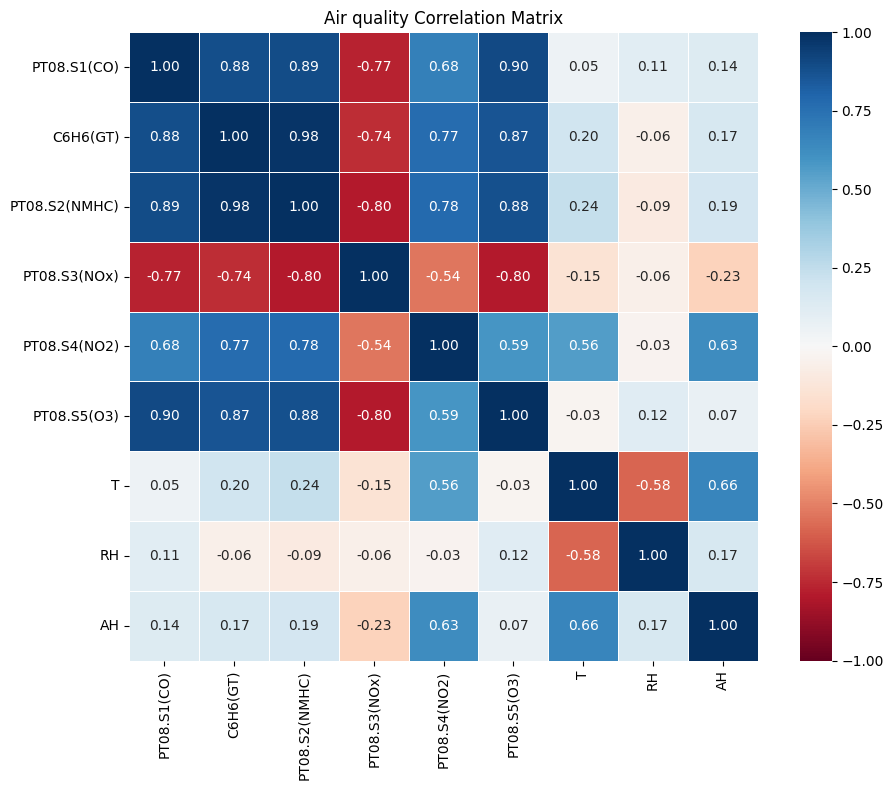

In [ ]:
# Correlation matrix between all numeric variables
corr_matrix = air_df[["PT08.S1(CO)", "C6H6(GT)", "PT08.S2(NMHC)", "PT08.S3(NOx)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    vmin=-1, vmax=1,
    square=True,
    linewidths=0.5
)
plt.title("Air quality Correlation Matrix")
plt.tight_layout()
plt.show()

We can see from this correlation matrix there are some strong positive and negative correlations between many of our variables! Since we're focused on the response variable, C6H6, let's look at the second row of this matrix, visualized with a bar graph.

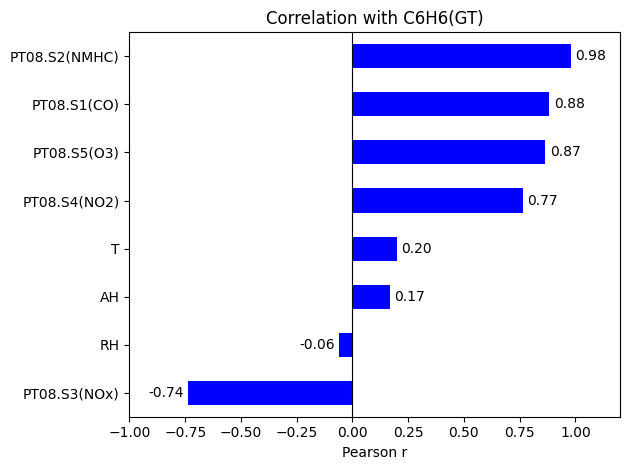

In [ ]:
benzene_corr = corr_matrix.loc["C6H6(GT)"].drop("C6H6(GT)")  # drop self-correlation

ax = benzene_corr.sort_values().plot(kind="barh", color="blue")
ax.bar_label(ax.containers[0], fmt="%.2f", padding=3)
plt.axvline(0, color="black", linewidth=0.8)
plt.title("Correlation with C6H6(GT)")
plt.xlabel("Pearson r")
plt.xlim(-1, 1.2)
plt.tight_layout()
plt.show()

We can see from this bar graph that the second sensor variable for NHMC has a very strong, almost perfect positive linear association with Benzene. The first, fifth, and fourth sensor variables also have strong, positive linear associations with benzene. In contrast, the third sensor variable has a strong negative association with benzene. The weather variables temperature and absolute humidity have weak positive associations, and relative humidity has approximately no correlation with benzene readings.

This leads us to believe that our sensor variables will be better predictors of true benzene measurements compared to the weather variables.

Now, lets generate some scatterplots to investigate these correlations further!

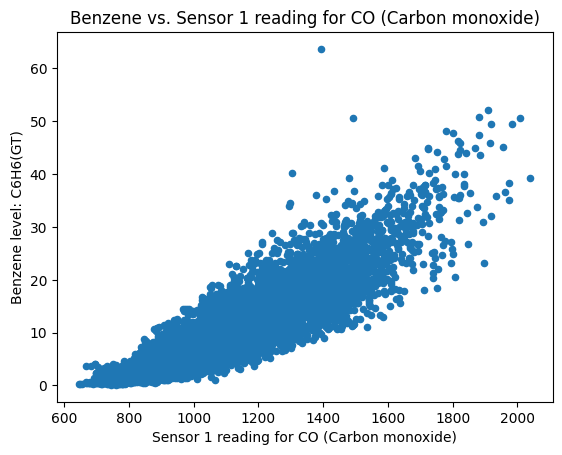

In [ ]:
# Scatterplot between PT08.S1(CO) and C6H6(GT)
air_df.plot.scatter(x = "PT08.S1(CO)", y = "C6H6(GT)")
plt.xlabel("Sensor 1 reading for CO (Carbon monoxide)")
plt.ylabel("Benzene level: C6H6(GT)")
plt.title("Benzene vs. Sensor 1 reading for CO (Carbon monoxide)")
plt.show()

If we use matplotlib and numpy, we can add a line of best fit to this scatterplot!

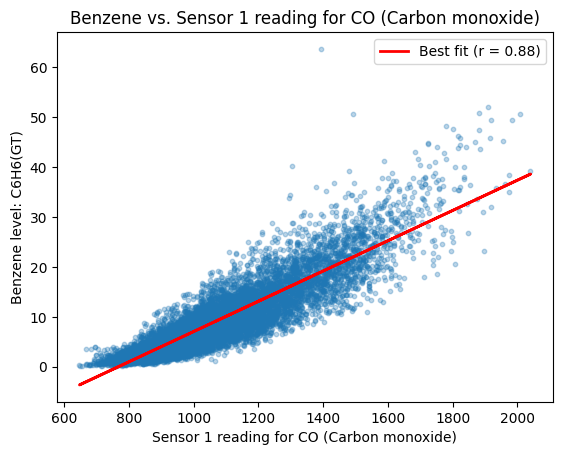

In [ ]:
x = air_df["PT08.S1(CO)"]
y = air_df["C6H6(GT)"]

# Line of best fit
m, b = np.polyfit(x, y, 1)

# R
r = np.corrcoef(x, y)[0, 1]

plt.scatter(x, y, alpha=0.3, s=10)
plt.plot(x, m * x + b, color="red", linewidth=2, label=f"Best fit (r = {r:.2f})")
plt.xlabel("Sensor 1 reading for CO (Carbon monoxide)")
plt.ylabel("Benzene level: C6H6(GT)")
plt.title("Benzene vs. Sensor 1 reading for CO (Carbon monoxide)")
plt.legend()
plt.show()

This is a scatterplot between our first sensor variable and the response variable benzene, which we investigated above. These variables have a correlation of r = 0.883, which as we can see is a strong, linear association. As one variable rises, the other tends to rise as well. However, there could be some issues with large/ non-constant variance.


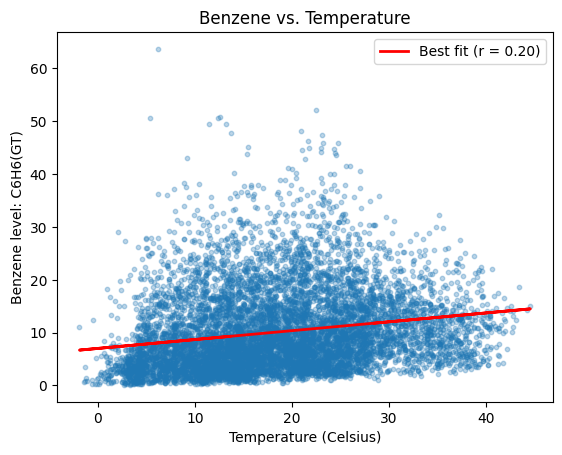

In [ ]:
# Scatterplot between benzene and temperature
x = air_df["T"]
y = air_df["C6H6(GT)"]

m, b = np.polyfit(x, y, 1)
r = np.corrcoef(x, y)[0, 1]

plt.scatter(x, y, alpha=0.3, s=10)
plt.plot(x, m * x + b, color="red", linewidth=2, label=f"Best fit (r = {r:.2f})")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Benzene level: C6H6(GT)")
plt.title("Benzene vs. Temperature")
plt.legend()
plt.show()

Above is a scatterplot of benzene vs temperature, which has a correlation r = 0.2. From this value and the scatterplot, there isn't a strong relationship between these two variables.

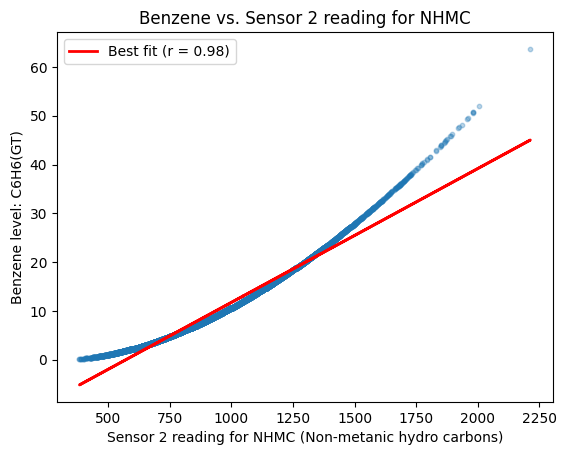

In [ ]:
# Scatterplot between PT08.S2(NMHC) and C6H6
x = air_df["PT08.S2(NMHC)"]
y = air_df["C6H6(GT)"]

m, b = np.polyfit(x, y, 1)
r = np.corrcoef(x, y)[0, 1]

plt.scatter(x, y, alpha=0.3, s=10)
plt.plot(x, m * x + b, color="red", linewidth=2, label=f"Best fit (r = {r:.2f})")
plt.xlabel("Sensor 2 reading for NHMC (Non-metanic hydro carbons)")
plt.ylabel("Benzene level: C6H6(GT)")
plt.title("Benzene vs. Sensor 2 reading for NHMC")
plt.legend()
plt.show()

This is the scatterplot between sensor 2 and our response, benzene. These two variables are very strongly correlated, with r = 0.98. However, from the curve in the scatterplot, the relationship might be modeled better by a quadratic equation, as the observed data at the higher and lower ends doesn't quite model the sensor readings.

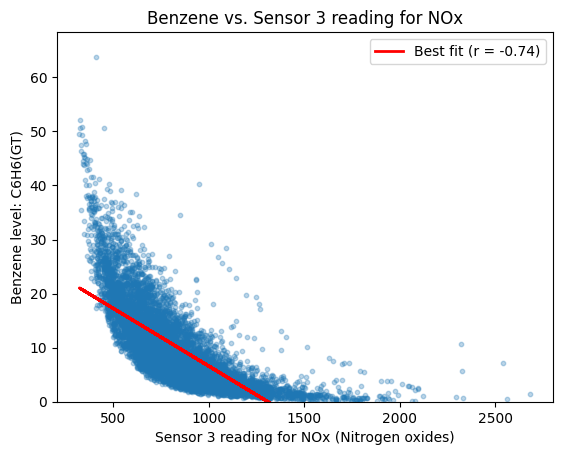

In [ ]:
# Scatterplot between PT08.S3(NOx) and C6H6
x = air_df["PT08.S3(NOx)"]
y = air_df["C6H6(GT)"]


m, b = np.polyfit(x, y, 1)
r = np.corrcoef(x, y)[0, 1]

plt.scatter(x, y, alpha=0.3, s=10)
plt.plot(x, m * x + b, color="red", linewidth=2, label=f"Best fit (r = {r:.2f})")
plt.xlabel("Sensor 3 reading for NOx (Nitrogen oxides)")
plt.ylabel("Benzene level: C6H6(GT)")
plt.title("Benzene vs. Sensor 3 reading for NOx")
plt.legend()
plt.ylim(bottom=0)
plt.show()

Finally, heres one more scatterplot between sensor 3 readings and benzene measurement. These variables have a correlation coefficient of r = -0.73, fairly strong negative relationship. The scatterplot of this data also shows some evidence of non-linearity from the downwarding sloping curve.

While some of these relationships between variables are strongly correlated, it's important to know that does not mean one causes the other!

## Trends over time

Now, since this is time series data over the course of a year, lets investigate how our response variable fluctuates over time!

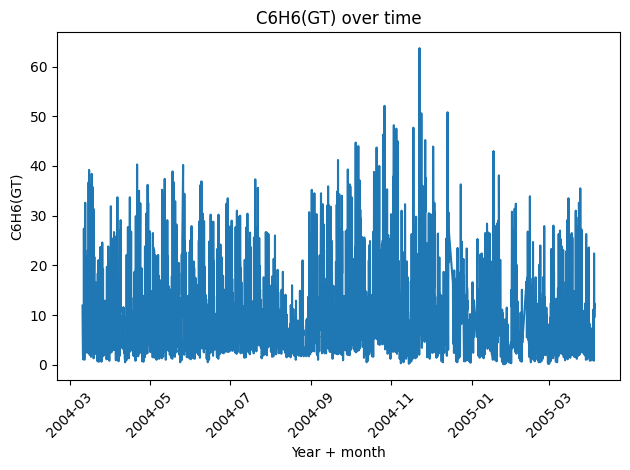

In [ ]:
# Plot of all benzene observations over time
air_df["Datetime"] = pd.to_datetime(air_df["Date"].astype(str) + " " + air_df["Time"].astype(str), format = "%m/%d/%Y %H:%M:%S")
plt.plot(air_df["Datetime"], air_df["C6H6(GT)"])
plt.xlabel("Year + month")
plt.ylabel("C6H6(GT)")
plt.title("C6H6(GT) over time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# And some combination of variables over time (benzene based on CO levels over time (month), four line graphs)

# Also need some sort of humidity investigation

This line graph of all observations of benzene over time is very messy, but it tells us some useful information! Because there are so many tightly packed spikes, we know that benzene levels fluctuate by large amounts over time. Perhaps having large changes by day or even by hour, so lets investigate that further!

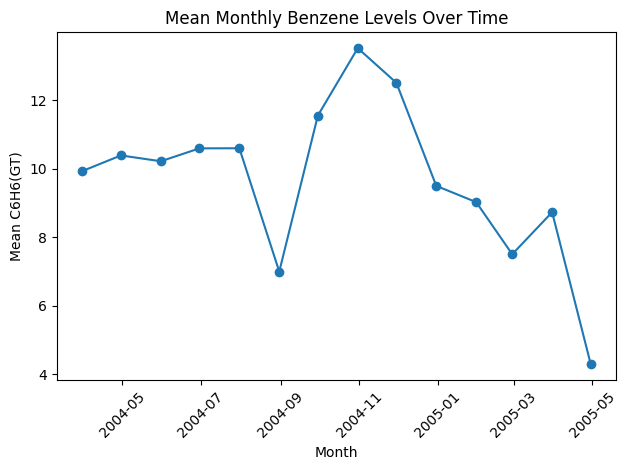

In [ ]:
# Monthly means
monthly_mean = air_df.set_index("Datetime")["C6H6(GT)"].resample("ME").mean()

plt.plot(monthly_mean.index, monthly_mean.values, marker="o")
plt.xlabel("Month")
plt.ylabel("Mean C6H6(GT)")
plt.title("Mean Monthly Benzene Levels Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here is the average monthly true benzene level over time. This line graph is much more readable, and has some interesting results. The mean benzene level stays relatively stable at around 10 micrograms from April to August 2004, then dips to around 7 mg in September before surging back up to over 11 mg in October, November, and December. At the start of 2005, it drops back down to under 10 mg in January and February, around 8 mg in March and April, and hits a historic low of around 4 mg in May, although this could be due to low sample size in this last month.

Above, we created a Datetime column by combining the date and time variables into one timestamp. Now, lets group observations by hour using `.dt`

In [ ]:
# C6H6(GT) by hour
air_df["Hour"] = air_df["Datetime"].dt.hour
hourly_mean = air_df.groupby("Hour")["C6H6(GT)"].mean()
print(hourly_mean)

Hour
0      7.684140
1      5.991711
2      4.379467
3      3.379255
4      2.916711
5      3.068435
6      4.756117
7     10.398936
8     15.894149
9     14.760317
10    12.237666
11    11.018085
12    10.824138
13    10.980637
14    10.316310
15    10.267914
16    11.118499
17    13.942857
18    16.639678
19    17.735580
20    15.384450
21    11.089008
22     8.977748
23     8.412634
Name: C6H6(GT), dtype: float64


By looking at mean atmospheric benzene by hour, we can see a significant drop in Benzene levels overnight compared to during the day.

In [ ]:
air_df.groupby("Hour")["C6H6(GT)"].std()

,C6H6(GT)
Hour,
0,3.921664
1,3.170991
2,2.561266
3,2.228278
4,1.991421
5,1.935430
6,2.768897
7,7.823343
8,9.829296


The standard deviation of benzene levels during the day also appears to be much higher than at night.

Let's plot this to clearly see the hourly change!

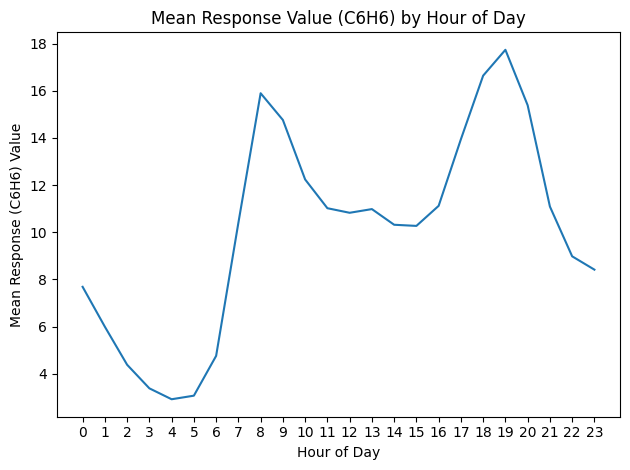

In [ ]:
plt.plot(hourly_mean.index, hourly_mean.values)
plt.xlabel('Hour of Day')
plt.ylabel('Mean Response (C6H6) Value')
plt.title('Mean Response Value (C6H6) by Hour of Day')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

### Summary and Interpretation

From this line graph, we can clearly see how benzene concentrations change throughout the day within this city, on average.

This data is taken from a populated city in Italy, so the spikes at around 9 AM and 1800 (7 PM) could be commuter traffic generating pollutants. The hours of 11 PM to 6 AM see a large dim in true benzene levels, on average, which could be due to less people, vehicles, factories, and such producing pollutants during these hours.

We can't say for sure, that would require formal hypothesis testing, but now we have several avenues to explore deeper in this dataset!

### Combination of variables

Finally, since we already have a column for hour of the day, sensor 1 reading bins (highly correlated, r = 0.88), and temperature bins, we could look at a combination of these variables and see how they affect benzene levels!

Lets look at time of day combined with the bins created earlier for sensor 1 (CO)

In [ ]:
hourly_co = air_df.groupby(["CO_bin", air_df["Datetime"].dt.hour], observed=True)["C6H6(GT)"].mean().unstack(level=0)
hourly_co.round(2)

CO_bin,Low,Moderate,High,Very High
Datetime,,,,
0,3.29,7.22,12.49,17.07
1,3.21,6.21,12.15,18.25
2,2.76,5.28,10.85,13.30
3,2.14,4.51,11.34,NaN
4,2.13,4.08,11.14,12.50
5,2.23,3.96,12.20,NaN
6,2.54,5.71,9.34,NaN
7,2.41,7.22,18.19,26.32
8,2.64,7.80,20.14,29.01


By using `.groupby` on our created CO_bin variable and Hour variable from the datetime, we can display a table of mean benzene levels grouped by these two categories.

We can generally see that as we go to the right in the table (higher CO reading), our benzene increases as well! Lets display this visually with several line graphs.

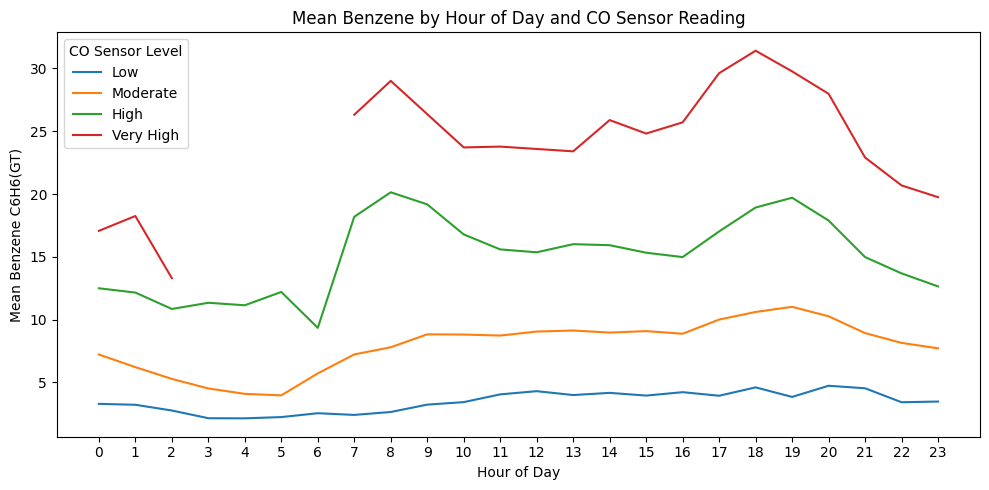

In [ ]:
# Plot of Mean benzene by hour, grouped by CO sensor level
hourly_co.plot(figsize=(10, 5))
plt.xlabel("Hour of Day")
plt.ylabel("Mean Benzene C6H6(GT)")
plt.title("Mean Benzene by Hour of Day and CO Sensor Reading")
plt.xticks(range(0, 24))
plt.legend(title="CO Sensor Level")
plt.tight_layout()
plt.show()

This plot of several line graphs shows Mean benzene level by hour, grouped by the level of Carbon monoxide sensed at the time. There is no overlap in the line graphs, confirming a strong correlation between the CO levels and true mean benzene. Again, like the line graph above we see spikes around rush hours, but they aren't as pronounced for the Moderate and Low groups.

We notice a gap for the 'very high' sensor line between 2AM and 7AM, indicating there aren't any observations between those hours with very high carbon monoxide levels. We can verify this by using the `.count()` method below.

In [ ]:
air_df.groupby(["CO_bin", air_df["Datetime"].dt.hour], observed=True)["C6H6(GT)"].count().unstack(level=0)

CO_bin,Low,Moderate,High,Very High
Datetime,,,,
0,46.0,264.0,56.0,6.0
1,85.0,262.0,25.0,2.0
2,161.0,202.0,11.0,1.0
3,203.0,165.0,8.0,NaN
4,248.0,123.0,5.0,1.0
5,214.0,159.0,4.0,NaN
6,125.0,241.0,10.0,NaN
7,62.0,192.0,103.0,19.0
8,28.0,127.0,169.0,52.0


There indeed are no or very few observations during the night in the 'Very high' CO level category, as well as during the day in the 'Low' category. We should be wary about making conclusions in the future for categories with low sample sizes.